In [1]:
from pandas import (
    concat,
    read_csv,
    to_datetime,
)

from post_processing.utils.fpod_utils import extract_site, percent_calc, year_percent, ym_percent, create_matrix,hist_mean_h, hist_mean_m, hist_mean_s
from post_processing.utils.core_utils import get_season

## Overview
Import the right dataset.

#### *CALAIS*

In [7]:
ca4 = read_csv(r"U:\Hours_DPM_FBUZZ_CA4.csv")
walde = read_csv(r"U:\Hours_DPM_FBUZZ_Walde.csv")

data_c = concat([ca4, walde])
data_c["start_datetime"] = to_datetime(data_c["start_datetime"])
data_c["start_datetime"] = data_c["start_datetime"].apply(lambda x : x.tz_convert("Europe/Paris"))
data_c["Hour"] = data_c["start_datetime"].dt.hour

#### *CETIROISE*

In [ ]:
ceti = read_csv(r"U:\Hours_DPM_FBUZZ_CETIROISE.csv")

ceti["start_datetime"] = to_datetime(ceti["start_datetime"])
ceti["start_datetime"] = ceti["start_datetime"].apply(lambda x : x.tz_convert("CET")) #TimeZone Central European Time
ceti["Hour"] = ceti["start_datetime"].dt.hour

#### *KERGUELEN*

In [ ]:
a = read_csv(r"U:\Hours_DPM_FBUZZ_SiteA.csv")
b = read_csv(r"U:\Hours_DPM_FBUZZ_SiteB.csv")
c = read_csv(r"U:\Hours_DPM_FBUZZ_SiteC.csv")
d = read_csv(r"U:\Hours_DPM_FBUZZ_SiteD.csv")

data_k = concat([a, b, c, d])
data_k["start_datetime"] = to_datetime(data_k["start_datetime"])
data_k["start_datetime"] = data_k["start_datetime"].apply(lambda x : x.tz_convert("Indian/Kerguelen"))
data_k["Hour"] = data_k["start_datetime"].dt.hour

### First results
Precise your dataset.

In [8]:
data = data_c #🐬

In [9]:
data = extract_site(data)
data["YMH"] = data["Year"].astype(str) + '-' + data["Month"].astype(str) + '-' + data["Hour"].astype(str)
y_per = percent_calc(data, "Year")
#t_per = percent_calc(data, "TRAVAUX")

In [10]:
ym_per = percent_calc(data, "YM")
ym_per["YM"] = to_datetime(ym_per["YM"])
ym_per["Season"] = ym_per["YM"].apply(lambda x: get_season(x)[0])
ym_per["Month"] = ym_per["YM"].dt.month
ym_per["Year"] = ym_per["YM"].dt.year

In [11]:
per_h = percent_calc(data, "YMH")
per_h[["Y","M","Hour"]] = per_h["YMH"].str.split("-", expand=True)
per_h["Hour"] = per_h["Hour"].astype(int)

In [12]:
matrice_s = create_matrix(ym_per, ["site.name"],["%DPH", "FBR"])
matrice_m = create_matrix(ym_per, ["site.name", "Month"],["%click", "FBR"])
matrice_h = create_matrix(per_h, ["site.name", "Hour"],["%click", "FBR"])

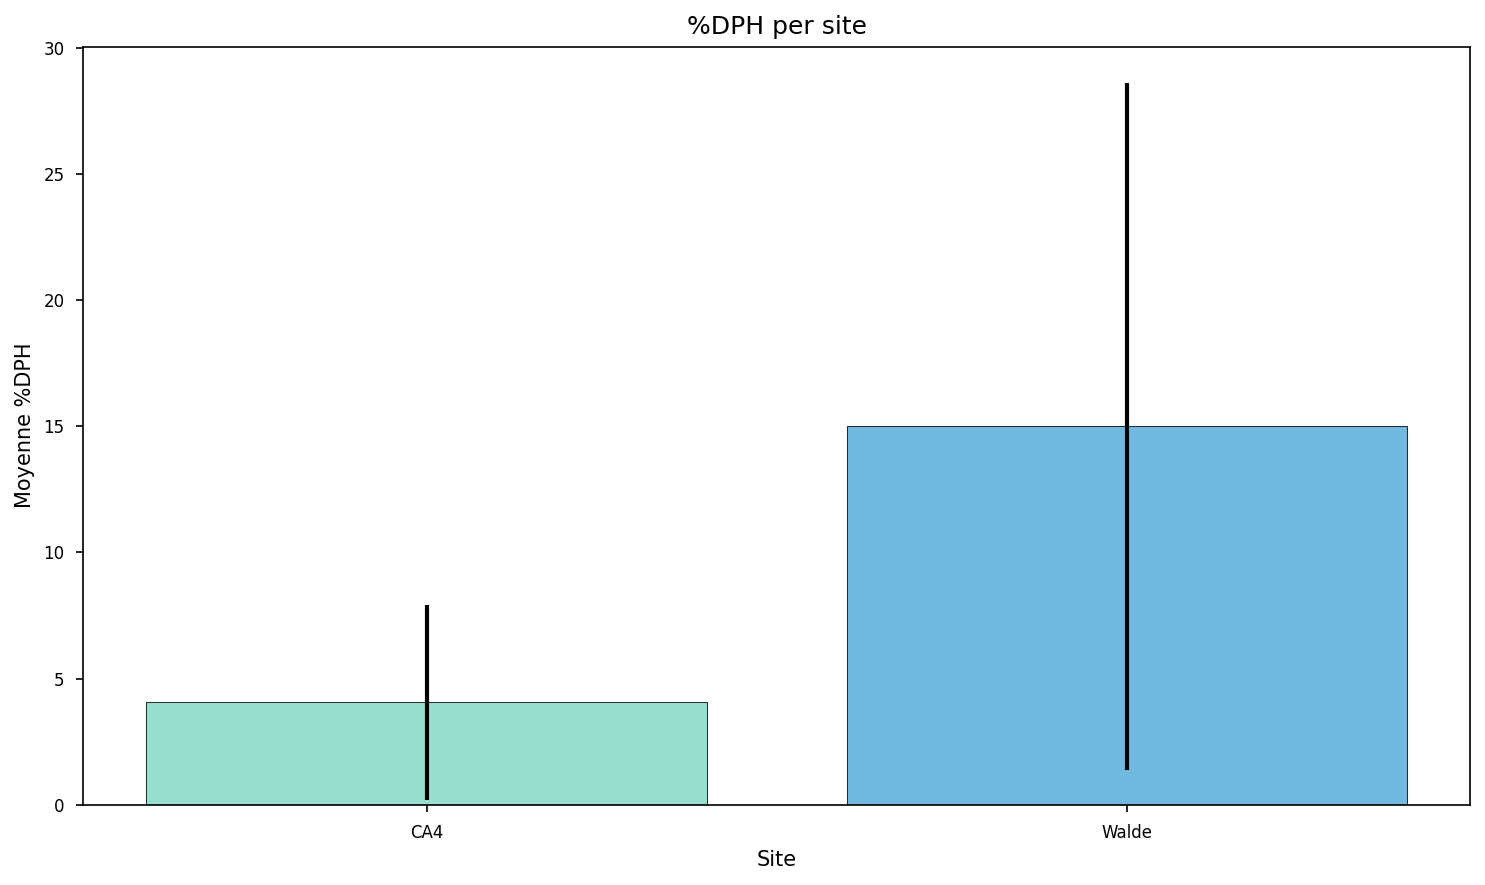

In [13]:
hist_mean_s(
    matrice_s,
    metric_mean="%DPH_mean",
    metric_std="%DPH_std",
    ylabel="Moyenne %DPH",
    title_suffix="%DPH"
)

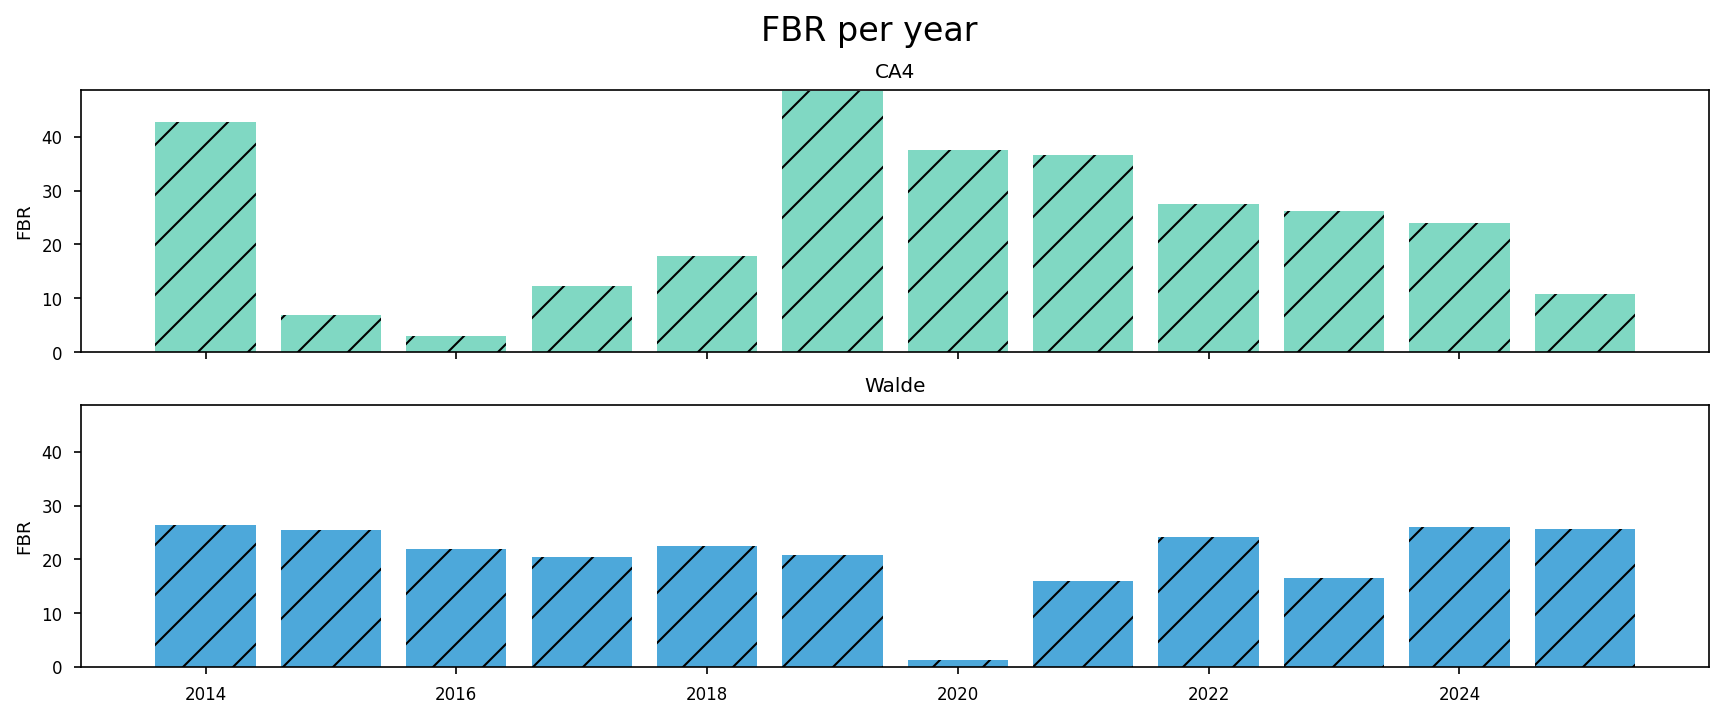

In [15]:
year_percent(y_per, "FBR")

In [ ]:
ym_percent(ym_per, "%click")

In [ ]:
hist_mean_m(
    matrice_m,
    metric_mean="%click_mean",
    metric_std="%click_std",
    ylabel="Moyenne %click",
    title_suffix="%click"
)

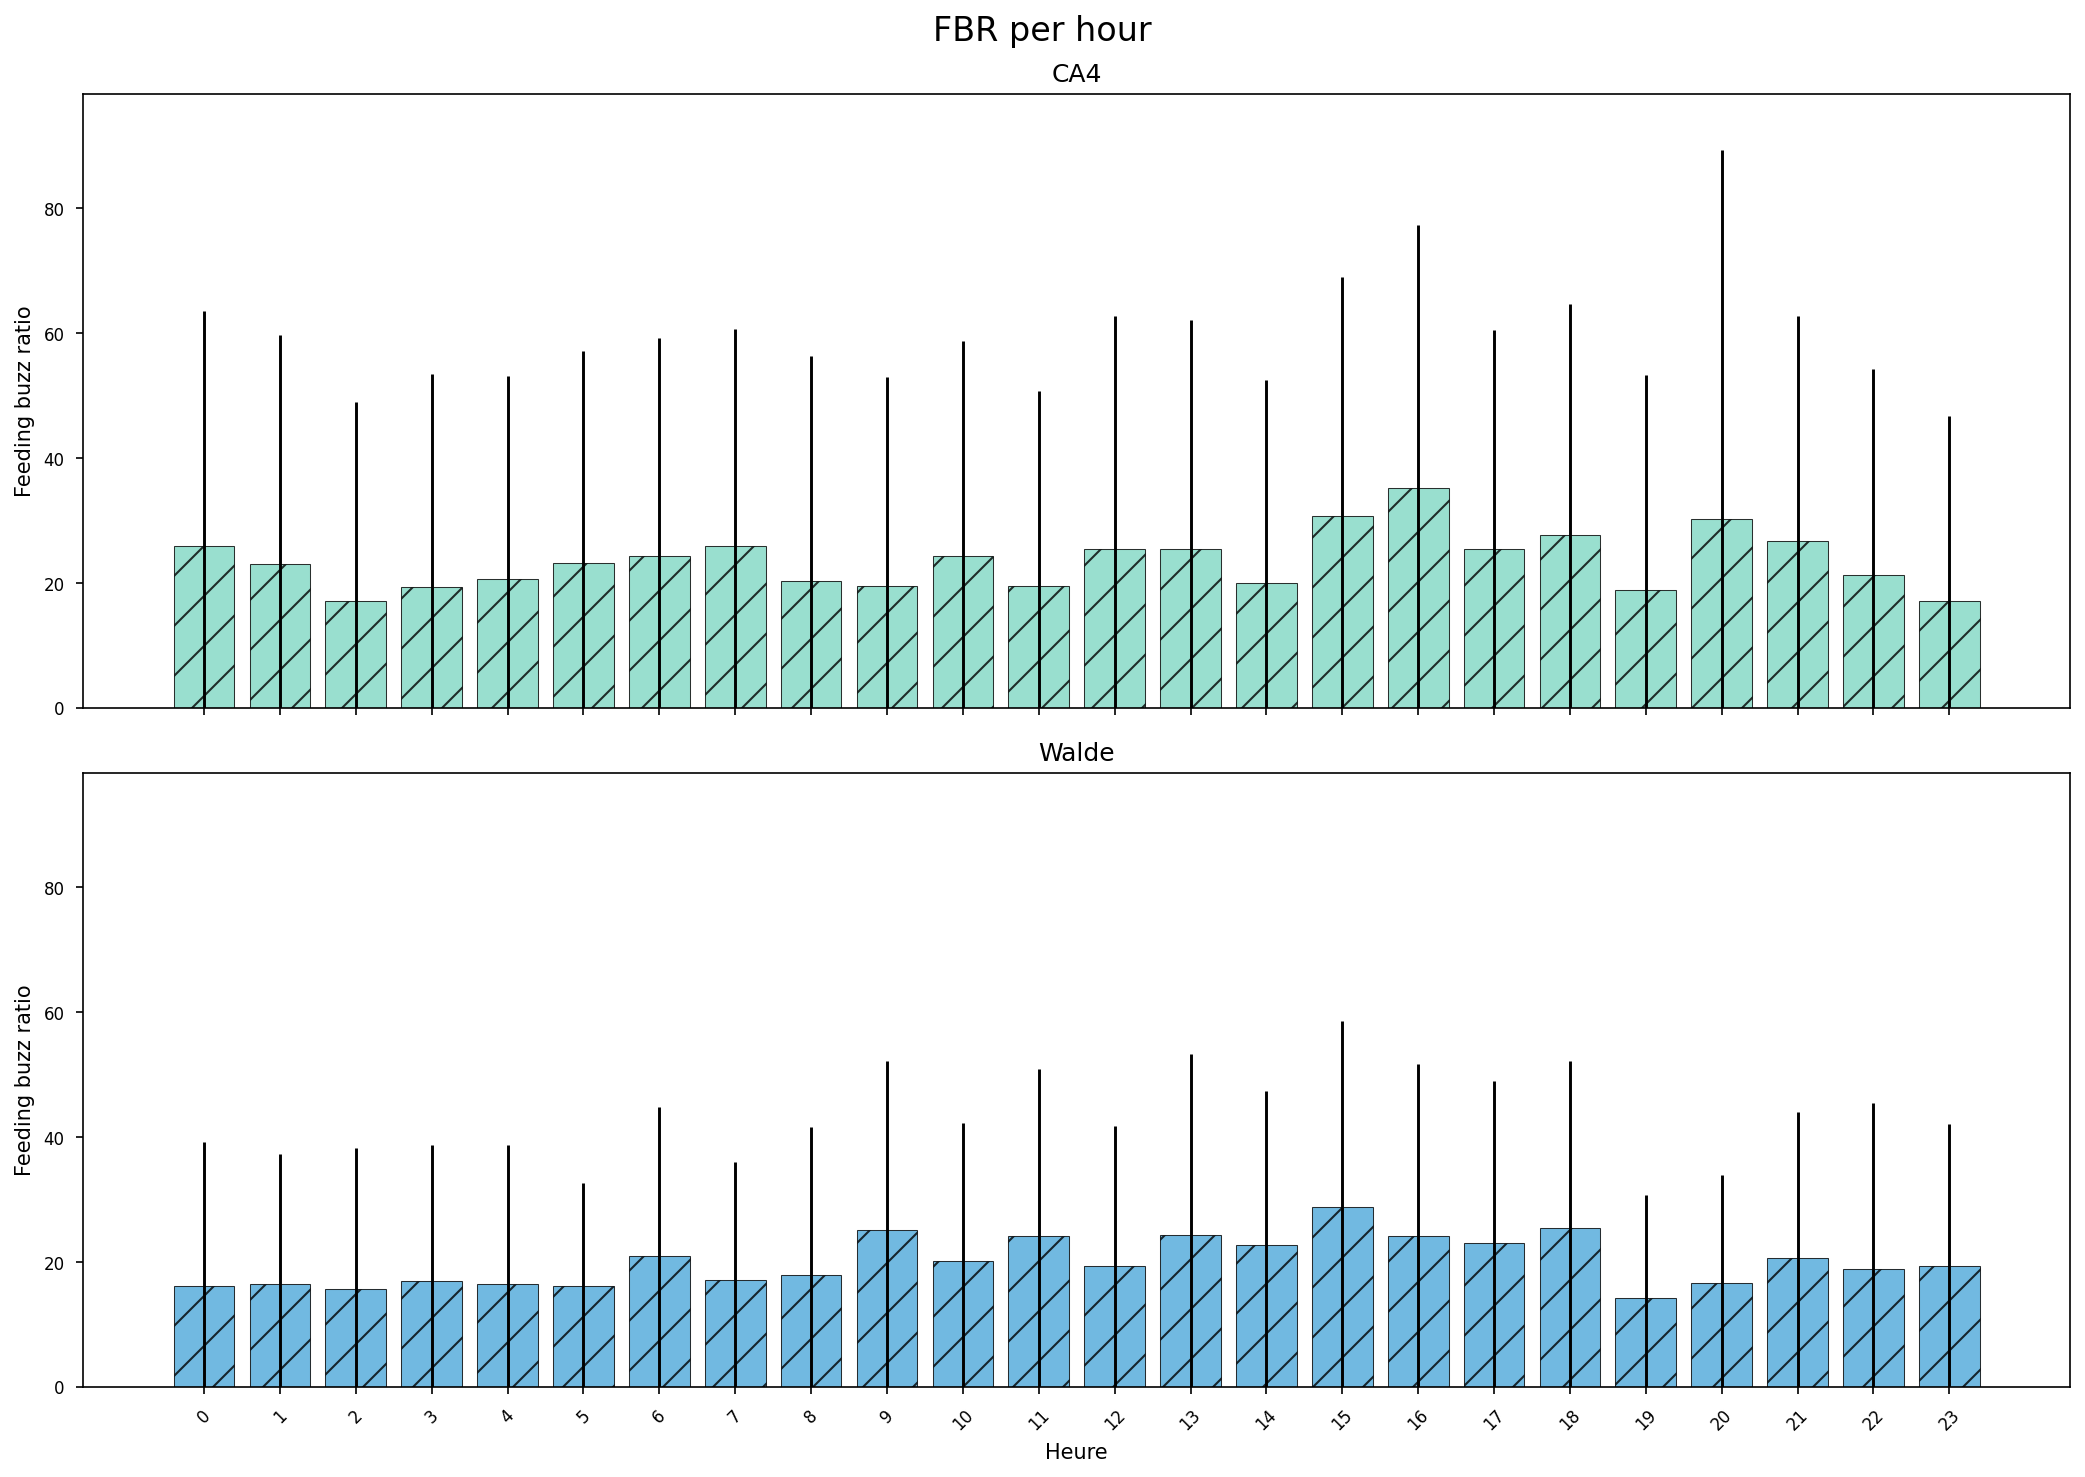

In [14]:
hist_mean_h(
    matrice_h,
    metric_mean="FBR_mean",
    metric_std="FBR_std",
    ylabel="Feeding buzz ratio",
    title_suffix="FBR"
)